In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
credits = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
credits.head(1)['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [5]:
credits.head(1)['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [6]:
 # merging data frames  
movies = movies.merge(credits, on='title')

In [7]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

ideally required features for content based recommendaton system 
 - Genres
 - movie_id
 - keywords
 - title
 - overview
 - cast
 - crew
 

In [8]:
movies = movies[['movie_id', 'title', 'overview', 'genres','keywords', 'cast' , 'crew']]
movies

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


# Preprocessing

In [9]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [10]:
movies.dropna(inplace=True)

In [11]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [12]:
movies.duplicated().sum()

0

In [13]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [14]:
# need to get the values of the name key in list
# but it is in form of a string
import ast

In [15]:
def convert(obj):
    L =[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L      

In [16]:
movies.genres = movies.genres.apply(convert)
movies

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [17]:
movies.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [18]:
movies['keywords'] = movies['keywords'].apply(convert)

In [19]:
movies['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

In [20]:
movies.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [21]:
def convert_cast(obj):
    l=[]
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            l.append(i['name'])
            counter +=1
        else:
            break
        
    return l

In [22]:
#top 3 cast
movies['cast'] = movies['cast'].apply(convert_cast)
movies['cast']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [23]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [24]:
def get_director(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            l.append(i['name'])
            break # there will be only one director in a movie.
        
    return l

In [25]:
movies.crew = movies['crew'].apply(get_director)

In [26]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [27]:
movies.overview[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [28]:
movies.overview = movies.overview.apply(lambda x:x.split())

In [29]:
movies.overview[0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [30]:
movies.genres = movies.genres.apply(lambda x:[i.replace(" ","") for i in x])
movies.keywords = movies.keywords.apply(lambda x:[i.replace(" ","") for i in x])
movies.cast = movies.cast.apply(lambda x:[i.replace(" ","") for i in x])
movies.crew = movies.crew.apply(lambda x:[i.replace(" ","") for i in x])

In [31]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [32]:
movies['tags'] = movies.overview+movies.genres+movies.keywords+movies.cast+movies.crew

In [33]:
movies.columns

Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew',
       'tags'],
      dtype='object')

In [34]:
new_df = movies[['movie_id', 'title', 'tags']]
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [35]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\LAB01R~1\AppData\Local\Temp/ipykernel_9548/3089450492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [36]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [37]:
new_df.tags = new_df.tags.apply(lambda x: x.lower())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
len(new_df.tags[0])

455

# Vectorization

In [39]:
# Bag of Words 

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5000, stop_words='english',binary=True)

In [40]:
vectors = cv.fit_transform(new_df['tags']).toarray()
vectors.shape

(4806, 5000)

In [41]:
cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '18thcentury',
 '19',
 '1930s',
 '1940s',
 '1944',
 '1950',
 '1950s',
 '1960s',
 '1970s',
 '1971',
 '1976',
 '1980',
 '1980s',
 '1985',
 '1990s',
 '1999',
 '19th',
 '19thcentury',
 '20',
 '200',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '60s',
 '70',
 '70s',
 'aaron',
 'aaroneckhart',
 'abandoned',
 'abducted',
 'abigailbreslin',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abuse',
 'abusive',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accompanied',
 'accomplish',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'act',
 'acting',
 'action',
 'actionhero',
 'actions',
 'activist',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adam',
 'adamsandler',
 'adamshankman',
 'adaptation',
 'adapted',
 'addict',
 'addic

# Stemming

In [42]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lab01R01Pc04\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
stopword = stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [46]:
new_df['tags'] = new_df['tags'].apply(stem)
new_df['tags'] 

C:\Users\LAB01R~1\AppData\Local\Temp/ipykernel_9548/3848338588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

# Similarity Check

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.0952501 , 0.06670373, ..., 0.02804964, 0.03279129,
        0.        ],
       [0.0952501 , 1.        , 0.06565322, ..., 0.02760788, 0.        ,
        0.        ],
       [0.06670373, 0.06565322, 1.        , ..., 0.02900074, 0.        ,
        0.        ],
       ...,
       [0.02804964, 0.02760788, 0.02900074, ..., 1.        , 0.08553989,
        0.05702659],
       [0.03279129, 0.        , 0.        , ..., 0.08553989, 1.        ,
        0.06666667],
       [0.        , 0.        , 0.        , ..., 0.05702659, 0.06666667,
        1.        ]])

In [49]:
import seaborn as sns

<AxesSubplot:>

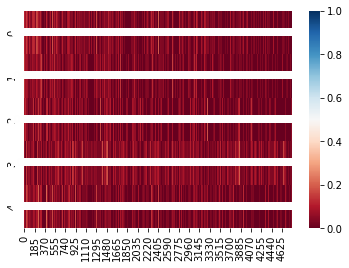

In [50]:
sns.heatmap(similarity[:5], annot=True, cmap='RdBu')

In [51]:
similarity.shape

(4806, 4806)

In [52]:
similarity[0].shape

(4806,)

In [53]:
# need to get top 5 high similarity scores
# we can sort it in descending order

sorted(similarity[0],reverse=True)


#This will sort the series but index postion will also be moved
# we will not only sort but also generate new indices usinf enumerate

[1.0000000000000002,
 0.254000254000381,
 0.2351585405008862,
 0.22416096662402304,
 0.21997067253202998,
 0.21561438627179413,
 0.2155263624321299,
 0.21166687833365086,
 0.21166687833365086,
 0.20739033894608508,
 0.2036532699906392,
 0.20365326999063918,
 0.20080483222562473,
 0.19925419255468718,
 0.19354838709677424,
 0.19354838709677422,
 0.19354838709677422,
 0.19200614429492774,
 0.19050019050028574,
 0.19050019050028574,
 0.18759161984421674,
 0.18759161984421674,
 0.1872514715682846,
 0.1872514715682846,
 0.18215302221567486,
 0.18215302221567486,
 0.1796053020267749,
 0.1796053020267749,
 0.17960530202677488,
 0.17960530202677488,
 0.17960530202677488,
 0.17960530202677488,
 0.17960530202677488,
 0.1771615786072478,
 0.17611748841908675,
 0.17424273674761284,
 0.1728252824550709,
 0.1728252824550709,
 0.1728252824550709,
 0.16971105832553265,
 0.16933350266692068,
 0.16933350266692068,
 0.16829781403596433,
 0.16675933649126753,
 0.16675933649126753,
 0.16675933649126753,
 0

In [54]:
# this will sort on new indices 
sorted(list(enumerate(similarity[0])))


#this will held the indexes also 
sorted(list(enumerate(similarity[0])),reverse=True, key=lambda x: x[1])[1:6]

[(1194, 0.254000254000381),
 (61, 0.2351585405008862),
 (47, 0.22416096662402304),
 (260, 0.21997067253202998),
 (322, 0.21561438627179413)]

In [55]:
#Getting index of any movie
new_df[new_df['title']=='Avatar']

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."


In [56]:
new_df[new_df['title']=='Avatar'].index[0]

0

In [57]:
#getting title of movie using index
print(new_df.iloc[0]['title'])
print(new_df.iloc[54]['title'])
print(new_df.iloc[216]['title'])

Avatar
The Good Dinosaur
Life of Pi


In [58]:
def recommend(movie):
    movie_index = new_df[new_df['title']==movie].index[0]
    distances = similarity[movie_index]
    movie_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x: x[1])[1:6]
    for i in movie_list:
        print(new_df.iloc[i[0]]['title'])

In [59]:
recommend('Avatar')

Small Soldiers
Jupiter Ascending
Star Trek Into Darkness
Ender's Game
The Fifth Element


In [60]:
new_df[new_df.title.str.startswith('A','a')]

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
7,99861,Avengers: Age of Ultron,when toni stark tri to jumpstart a dormant pea...
32,12155,Alice in Wonderland,"alice, an unpretenti and individu 19-year-old,..."
60,17979,A Christmas Carol,miser ebenez scroog is awaken on christma eve ...
105,241259,Alice Through the Looking Glass,"in the sequel to tim burton' ""alic in wonderla..."
...,...,...,...
4720,282128,An American in Hollywood,a talent young filmmak from new york set off t...
4724,18632,A Dog's Breakfast,if you'v never been good at anyth in your life...
4754,74777,Absentia,tricia' husband daniel ha been miss for seven ...
4767,222250,A True Story,"mike and matt own noth and share everything, i..."


In [61]:
recommend('Batman')

Batman
Batman & Robin
Batman Forever
The Dark Knight Rises
Batman Returns


In [62]:
recommend('John Carter')

Star Trek: Insurrection
Jurassic World
The Fifth Element
Captain America: Civil War
Independence Day: Resurgence


In [63]:
new_df['title'].to_dict()

{0: 'Avatar',
 1: "Pirates of the Caribbean: At World's End",
 2: 'Spectre',
 3: 'The Dark Knight Rises',
 4: 'John Carter',
 5: 'Spider-Man 3',
 6: 'Tangled',
 7: 'Avengers: Age of Ultron',
 8: 'Harry Potter and the Half-Blood Prince',
 9: 'Batman v Superman: Dawn of Justice',
 10: 'Superman Returns',
 11: 'Quantum of Solace',
 12: "Pirates of the Caribbean: Dead Man's Chest",
 13: 'The Lone Ranger',
 14: 'Man of Steel',
 15: 'The Chronicles of Narnia: Prince Caspian',
 16: 'The Avengers',
 17: 'Pirates of the Caribbean: On Stranger Tides',
 18: 'Men in Black 3',
 19: 'The Hobbit: The Battle of the Five Armies',
 20: 'The Amazing Spider-Man',
 21: 'Robin Hood',
 22: 'The Hobbit: The Desolation of Smaug',
 23: 'The Golden Compass',
 24: 'King Kong',
 25: 'Titanic',
 26: 'Captain America: Civil War',
 27: 'Battleship',
 28: 'Jurassic World',
 29: 'Skyfall',
 30: 'Spider-Man 2',
 31: 'Iron Man 3',
 32: 'Alice in Wonderland',
 33: 'X-Men: The Last Stand',
 34: 'Monsters University',
 35: 

In [64]:
import pickle
pickle.dump(new_df, open("movies.pkl", 'wb'))

In [65]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [66]:
paragraph = """Lorem Ipsum is simply dummy text of the printing and typesetting industry.

Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. 
It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. 
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, 
and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.
Why do we use it?
It is a long established fact that a reader will be distracted by the readable content of a page when looking at its layout. 
The point of using Lorem Ipsum is that it has a more-or-less normal distribution of letters, as opposed to using 
'Content here, content here', making it look like readable English. Many desktop publishing packages and web page 
editors now use Lorem Ipsum as their default model text, and a search for 'lorem ipsum' will uncover many web sites 
still in their infancy. Various versions have evolved over the years, sometimes by accident, sometimes on purpose
(injected humour and the like).

"""
para = paragraph.split(".")

print(len(paragraph))


# lorem 10 
# ispum 20 


1216


In [67]:
len(para)

9

<a href='https://hackernoon.com/how-to-use-streamlit-and-python-to-build-a-data-science-app'> Watch this </a>

In [68]:
import re
para = 'Abdullah'
for i in para:
    red = re.sub('[^a-cA-C0-9]',' ','Abdullah').split()
print(red)

['Ab', 'a']


In [69]:
import re
para = 'Abdullah'
for i in para:
    red = re.sub('[^a-cA-C0-9]',' ','Abdullah')
print(red)

Ab    a 


In [70]:
import re
para = 'Abdullah34'
for i in range(len(para)):
    red = re.sub('[^a-cA-C]',' ','Abdullah34')
print(red)

Ab    a   


In [71]:
import re
para = 'Abdullah34'
for i in range(len(para)):
    red = re.sub('[^0-9]',' ','Abdullah34')
print(red)

        34


In [72]:
import re
para = 'Abdullah34'
for i in range(len(para)):
    red = re.sub('[^0-9A-D]',' ','Abdullah34')
print(red)

A       34


# The Syntax-Semantics Barrier:

<img src='https://upload.wikimedia.org/wikipedia/commons/e/eb/Syntactic-semantic_trees.gif' />

# tfidf vectorizer:

<img src='https://content.codecademy.com/programs/chatbots/tfidf/tfidf-transformer.gif' />
<img src='https://cdn-images-1.medium.com/fit/t/1600/480/1*T8WWibd7u8b7gfgeG0LgAA.gif' />

<img src='https://miro.medium.com/max/554/0*B9GC_f3BMtjGMdQ-.png'>

<img src='https://www.e-bcrp.org/journal/bcrp/bcrp-3-2/gif/bcrp-3-2-122-g13.gif'>

<img src='https://miro.medium.com/max/1200/1*qQgnyPLDIkUmeZKN2_ZWbQ.png'>

<img src='https://i.ytimg.com/vi/vZAXpvHhQow/maxresdefault.jpg'>

# Click on image to read more:

<a href='https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/'><img src='https://cdn-media-1.freecodecamp.org/images/1*q3qYevXqQOjJf6Pwdlx8Mw.png' /> </a>

In [73]:
#Done